<a href="https://colab.research.google.com/github/GerardoMunoz/Curso_Python/blob/main/IR_control.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Control

# Decoding an IR Digital Signal



## Electronic Components Assembly
1. Connect the Raspberry Pico (W) to the computer using a micro USB cable.
2. Connect a LED with its resistor to GP0.
3. Connect an IR sensor as follows:

| IR Sensor | Raspberry Pico |
|-----------|----------------|
| Vout      | GP17           |
| GND       | GND            |
| Vcc       | 3V3            |


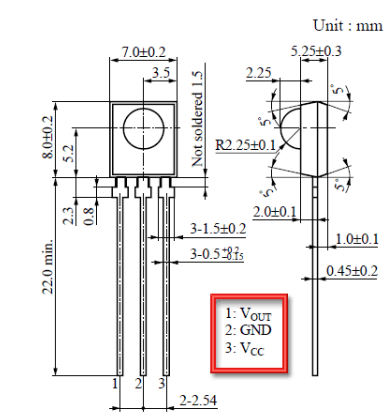


## Background

The output of the IR sensor TSSP4038 (Vcc) goes high when it receives an infrared light blinking at 38 kHz.

In an IR remote control, logic zero and logic one are represented by varying blinking durations, with the specific timings depending on the remote control model. Each key on the remote control is associated with a unique combination of logic ones and logic zeros. The goal is to decipher the representation of each digit using the specific remote control's blinking patterns.


## Code in MicroPython for Raspberry Pico (W)

The following code displays the timing of the blinking intervals and the time between two consecutive blinks.
```python
import time
import rp2
from machine import Pin

@rp2.asm_pio(set_init=rp2.PIO.OUT_LOW)
def blink():
    label('inicio')
    mov(x,invert(null))
    jmp(pin,'uno')
    label('cero')
    set(pins, 0)
    jmp(x_dec,'cero_bis')
    jmp('fin')
    label('cero_bis')
    jmp(pin,'fin')
    jmp('cero')
    label('uno')
    set(pins, 1)
    jmp(x_dec,'uno_bis')
    jmp('fin')
    label('uno_bis')
    nop()
    jmp(pin,'uno')
    label('fin')
    mov(isr,x)
    push(noblock)
    jmp('inicio')

   
sm = rp2.StateMachine(
    0,
    blink,
    freq=38000*100,
    set_base=Pin(0),
    jmp_pin= Pin(17, Pin.IN, Pin.PULL_UP)
)

sm.active(1)
while True:
    dat=sm.get()
    print(2**32-dat,end=', ')

```


## Example Scenario

When the '0' key is pressed, the following sequence is displayed:



```
896431, 9244, 4221, 647, 468, 643, 471, 649, 466, 642, 469, 646, 468, 644, 471,
 644, 469, 645, 469, 647, 1518, 645, 1520, 642, 1522, 640, 1527, 619, 1547,
  638, 1528, 641, 1520, 644, 1524, 620, 496, 645, 1522, 642, 1523, 642, 472,
  618, 1548, 641, 474, 619, 497, 618, 497, 644, 1522, 641, 473, 644, 471, 640,
  1525, 642, 470, 640, 1525, 642, 1522, 645, 1519, 643, 37904, 9218, 2069, 644,

```


After pressing the '0' key 10 times, with more than 2-second interval between each press, the following pattern is displayed:


1.   Elemento de lista
2.   Elemento de lista



```

1227929, 9331, 4336, 532, 506, 616, 502, 639, 476, 645, 472, 619, 497, 619,
499, 620, 496, 646, 473, 620, 1545, 647, 1517, 621, 1548, 614, 1552, 649, 1517,
645, 1518, 646, 1517, 647, 1515, 640, 473, 643, 1519, 648, 1517, 649, 467, 625,
1545, 648, 466, 649, 468, 654, 459, 652, 1513, 644, 471, 649, 467, 650, 1515,
649, 469, 646, 1522, 649, 1517, 652, 1513, 649, 37859, 9176, 2062, 678, 91167,
9226, 2106, 604, 1928130, 2918, 403, 3087, 837, 1090, 4286, 578, 508, 608, 531,
585, 533, 250, 2266, 287, 702, 316, 753, 502, 560, 555, 1641, 553, 1591, 551,
1613, 581, 1588, 587, 1581, 581, 1565, 607, 1561, 610, 1557, 612, 503, 611,
1554, 612, 1555, 610, 507, 610, 1556, 610, 529, 583, 510, 609, 507, 610, 1558,
609, 510, 612, 504, 611, 1556, 611, 532, 583, 1584, 582, 1586, 580, 1586, 553,
37863, 9314, 2078, 615, 2474576, 9108, 4255, 606, 501, 606, 501, 604, 501, 607,
500, 607, 499, 606, 500, 605, 499, 606, 499, 605, 1553, 605, 1550, 604, 1552,
631, 1523, 601, 1553, 606, 1552, 603, 1551, 629, 1527, 606, 498, 628, 1527,
606, 1547, 608, 498, 603, 1551, 633, 473, 605, 502, 609, 499, 608, 1551, 606,
499, 606, 499, 605, 1550, 607, 497, 608, 1547, 603, 1551, 608, 1546, 608,
37944, 9024, 2100, 631, 2557320, 9275, 4286, 553, 563, 605, 513, 555, 564, 554,
565, 579, 538, 585, 530, 584, 532, 584, 530, 585, 1559, 608, 1557, 608, 1557,
608, 1582, 582, 1584, 578, 1586, 580, 1585, 581, 1584, 582, 533, 582, 1584,
582, 1560, 602, 537, 580, 1584, 610, 506, 582, 509, 608, 532, 583, 1560, 609,
531, 584, 532, 584, 1561, 605, 511, 606, 1582, 582, 1559, 606, 1557, 613,
37920, 9078, 2106, 602, 3068902, 9168, 4262, 604, 509, 600, 508, 602, 530, 578,
508, 602, 530, 581, 507, 603, 507, 601, 507, 629, 1533, 604, 1558, 602, 1561,
601, 1560, 605, 1558, 602, 1554, 605, 1555, 603, 1557, 603, 502, 604, 1556,
602, 1555, 602, 505, 599, 1557, 600, 506, 599, 506, 599, 504, 602, 1556, 600,
507, 598, 506, 603, 1555, 601, 506, 602, 1556, 602, 1559, 600, 1559, 601,
37981, 9026, 2143, 571, 2189940, 9187, 4260, 604, 506, 607, 503, 603, 505, 605,
503, 607, 503, 604, 505, 603, 502, 606, 501, 606, 1555, 607, 1553, 607, 1552,
605, 1554, 605, 1558, 604, 1557, 607, 1556, 603, 1556, 604, 507, 605, 1554,
609, 1555, 608, 503, 605, 1555, 609, 504, 605, 504, 608, 502, 606, 1555, 607,
504, 605, 504, 631, 1532, 608, 504, 605, 1555, 608, 1553, 609, 1552, 608,
37947, 9136, 2075, 610, 2143310, 9140, 4312, 553, 561, 570, 537, 568, 539, 570,
537, 546, 561, 577, 531, 579, 506, 603, 530, 580, 1557, 599, 1556, 601, 1557,
600, 1557, 601, 1555, 602, 1559, 599, 1557, 602, 1552, 602, 505, 602, 1554,
599, 1556, 600, 504, 600, 1557, 600, 502, 602, 501, 600, 503, 599, 1556, 601,
502, 603, 502, 598, 1557, 599, 505, 599, 1555, 599, 1556, 602, 1555, 602,
37958, 9052, 2106, 604, 2064092, 9128, 4257, 605, 506, 605, 504, 604, 503, 604,
502, 604, 504, 602, 503, 603, 505, 606, 499, 601, 1555, 604, 1553, 605, 1553,
603, 1552, 606, 1552, 602, 1777, 392, 1556, 598, 1558, 598, 506, 599, 1557,
595, 1579, 519, 590, 573, 1589, 575, 539, 551, 563, 548, 565, 548, 1615, 547,
539, 602, 508, 605, 1556, 607, 504, 606, 1557, 600, 1554, 626, 1529, 601,
37947, 8970, 2101, 631, 2465084, 9060, 4260, 603, 505, 602, 503, 599, 505, 602,
503, 599, 504, 628, 477, 601, 503, 605, 502, 599, 1556, 603, 1554, 601, 1555,
602, 1551, 602, 1553, 603, 1555, 604, 1554, 603, 1554, 601, 502, 603, 1553,
604, 1552, 604, 502, 603, 1555, 603, 502, 602, 502, 603, 502, 624, 1531, 626,
477, 602, 500, 604, 1552, 600, 503, 603, 1550, 604, 1552, 605, 1551, 603,
37955, 9046, 2073, 606, 2395319, 9063, 4345, 518, 563, 550, 589, 524, 562, 544,
563, 572, 539, 548, 587, 520, 560, 567, 539, 570, 1589, 569, 1590, 568, 1593,
521, 1692, 442, 1665, 541, 1614, 569, 1591, 564, 1591, 564, 537, 548, 1613,
547, 1612, 546, 588, 542, 1591, 572, 537, 545, 564, 569, 538, 546, 1641, 520,
588, 519, 564, 546, 1615, 544, 589, 522, 1615, 547, 1615, 568, 1615, 522,
38012, 9052, 2143, 544, 2458182, 8921, 4318, 540, 561, 564, 538, 540, 560, 564,
537, 563, 537, 564, 536, 539, 561, 541, 561, 563, 1590, 541, 1612, 541, 1613,
565, 1589, 564, 1589, 566, 1564, 565, 1614, 564, 1590, 565, 535, 543, 1588,
591, 1561, 566, 539, 586, 1590, 566, 535, 566, 535, 567, 535, 566, 1564, 590,
536, 564, 537, 565, 1590, 563, 538, 566, 1589, 541, 1611, 568, 1587, 565,
37982, 8972, 2137, 567, 1622321, 9030, 4289, 567, 535, 567, 536, 542, 560, 565,
534, 542, 535, 590, 512, 566, 558, 567, 535, 542, 1613, 566, 1590, 542, 1614,
568, 1590, 569, 1615, 542, 1590, 570, 1587, 544, 1614, 544, 561, 542, 1613,
566, 1588, 544, 559, 566, 1587, 567, 535, 545, 559, 543, 562, 543, 1614, 543,
561, 567, 538, 543, 1614, 543, 562, 565, 1591, 567, 1589, 569, 1565, 590,
37959, 9050, 2138, 545,

```


## Data Analysis for Pattern Discovery

The next step involves analyzing the data to uncover the underlying pattern. To begin, a variable `input_data` is defined.

In [ ]:
input_data = [1227929, 9331, 4336, 532, 506, 616, 502, 639, 476, 645, 472, 619, 497, 619, 499, 620, 496, 646, 473, 620, 1545, 647, 1517, 621, 1548, 614, 1552, 649, 1517, 645, 1518, 646, 1517, 647, 1515, 640, 473, 643, 1519, 648, 1517, 649, 467, 625, 1545, 648, 466, 649, 468, 654, 459, 652, 1513, 644, 471, 649, 467, 650, 1515, 649, 469, 646, 1522, 649, 1517, 652, 1513, 649, 37859, 9176, 2062, 678, 91167, 9226, 2106, 604, 1928130, 2918, 403, 3087, 837, 1090, 4286, 578, 508, 608, 531, 585, 533, 250, 2266, 287, 702, 316, 753, 502, 560, 555, 1641, 553, 1591, 551, 1613, 581, 1588, 587, 1581, 581, 1565, 607, 1561, 610, 1557, 612, 503, 611, 1554, 612, 1555, 610, 507, 610, 1556, 610, 529, 583, 510, 609, 507, 610, 1558, 609, 510, 612, 504, 611, 1556, 611, 532, 583, 1584, 582, 1586, 580, 1586, 553, 37863, 9314, 2078, 615, 2474576, 9108, 4255, 606, 501, 606, 501, 604, 501, 607, 500, 607, 499, 606, 500, 605, 499, 606, 499, 605, 1553, 605, 1550, 604, 1552, 631, 1523, 601, 1553, 606, 1552, 603, 1551, 629, 1527, 606, 498, 628, 1527, 606, 1547, 608, 498, 603, 1551, 633, 473, 605, 502, 609, 499, 608, 1551, 606, 499, 606, 499, 605, 1550, 607, 497, 608, 1547, 603, 1551, 608, 1546, 608, 37944, 9024, 2100, 631, 2557320, 9275, 4286, 553, 563, 605, 513, 555, 564, 554, 565, 579, 538, 585, 530, 584, 532, 584, 530, 585, 1559, 608, 1557, 608, 1557, 608, 1582, 582, 1584, 578, 1586, 580, 1585, 581, 1584, 582, 533, 582, 1584, 582, 1560, 602, 537, 580, 1584, 610, 506, 582, 509, 608, 532, 583, 1560, 609, 531, 584, 532, 584, 1561, 605, 511, 606, 1582, 582, 1559, 606, 1557, 613, 37920, 9078, 2106, 602, 3068902, 9168, 4262, 604, 509, 600, 508, 602, 530, 578, 508, 602, 530, 581, 507, 603, 507, 601, 507, 629, 1533, 604, 1558, 602, 1561, 601, 1560, 605, 1558, 602, 1554, 605, 1555, 603, 1557, 603, 502, 604, 1556, 602, 1555, 602, 505, 599, 1557, 600, 506, 599, 506, 599, 504, 602, 1556, 600, 507, 598, 506, 603, 1555, 601, 506, 602, 1556, 602, 1559, 600, 1559, 601, 37981, 9026, 2143, 571, 2189940, 9187, 4260, 604, 506, 607, 503, 603, 505, 605, 503, 607, 503, 604, 505, 603, 502, 606, 501, 606, 1555, 607, 1553, 607, 1552, 605, 1554, 605, 1558, 604, 1557, 607, 1556, 603, 1556, 604, 507, 605, 1554, 609, 1555, 608, 503, 605, 1555, 609, 504, 605, 504, 608, 502, 606, 1555, 607, 504, 605, 504, 631, 1532, 608, 504, 605, 1555, 608, 1553, 609, 1552, 608, 37947, 9136, 2075, 610, 2143310, 9140, 4312, 553, 561, 570, 537, 568, 539, 570, 537, 546, 561, 577, 531, 579, 506, 603, 530, 580, 1557, 599, 1556, 601, 1557, 600, 1557, 601, 1555, 602, 1559, 599, 1557, 602, 1552, 602, 505, 602, 1554, 599, 1556, 600, 504, 600, 1557, 600, 502, 602, 501, 600, 503, 599, 1556, 601, 502, 603, 502, 598, 1557, 599, 505, 599, 1555, 599, 1556, 602, 1555, 602, 37958, 9052, 2106, 604, 2064092, 9128, 4257, 605, 506, 605, 504, 604, 503, 604, 502, 604, 504, 602, 503, 603, 505, 606, 499, 601, 1555, 604, 1553, 605, 1553, 603, 1552, 606, 1552, 602, 1777, 392, 1556, 598, 1558, 598, 506, 599, 1557, 595, 1579, 519, 590, 573, 1589, 575, 539, 551, 563, 548, 565, 548, 1615, 547, 539, 602, 508, 605, 1556, 607, 504, 606, 1557, 600, 1554, 626, 1529, 601, 37947, 8970, 2101, 631, 2465084, 9060, 4260, 603, 505, 602, 503, 599, 505, 602, 503, 599, 504, 628, 477, 601, 503, 605, 502, 599, 1556, 603, 1554, 601, 1555, 602, 1551, 602, 1553, 603, 1555, 604, 1554, 603, 1554, 601, 502, 603, 1553, 604, 1552, 604, 502, 603, 1555, 603, 502, 602, 502, 603, 502, 624, 1531, 626, 477, 602, 500, 604, 1552, 600, 503, 603, 1550, 604, 1552, 605, 1551, 603, 37955, 9046, 2073, 606, 2395319, 9063, 4345, 518, 563, 550, 589, 524, 562, 544, 563, 572, 539, 548, 587, 520, 560, 567, 539, 570, 1589, 569, 1590, 568, 1593, 521, 1692, 442, 1665, 541, 1614, 569, 1591, 564, 1591, 564, 537, 548, 1613, 547, 1612, 546, 588, 542, 1591, 572, 537, 545, 564, 569, 538, 546, 1641, 520, 588, 519, 564, 546, 1615, 544, 589, 522, 1615, 547, 1615, 568, 1615, 522, 38012, 9052, 2143, 544, 2458182, 8921, 4318, 540, 561, 564, 538, 540, 560, 564, 537, 563, 537, 564, 536, 539, 561, 541, 561, 563, 1590, 541, 1612, 541, 1613, 565, 1589, 564, 1589, 566, 1564, 565, 1614, 564, 1590, 565, 535, 543, 1588, 591, 1561, 566, 539, 586, 1590, 566, 535, 566, 535, 567, 535, 566, 1564, 590, 536, 564, 537, 565, 1590, 563, 538, 566, 1589, 541, 1611, 568, 1587, 565, 37982, 8972, 2137, 567, 1622321, 9030, 4289, 567, 535, 567, 536, 542, 560, 565, 534, 542, 535, 590, 512, 566, 558, 567, 535, 542, 1613, 566, 1590, 542, 1614, 568, 1590, 569, 1615, 542, 1590, 570, 1587, 544, 1614, 544, 561, 542, 1613, 566, 1588, 544, 559, 566, 1587, 567, 535, 545, 559, 543, 562, 543, 1614, 543, 561, 567, 538, 543, 1614, 543, 562, 565, 1591, 567, 1589, 569, 1565, 590, 37959, 9050, 2138, 545,]


Next, you can segment each key press based on the significant time gap between them. This time gap is notably larger than the intervals within each key's pattern. The question is: **What threshold value can we use to distinguish between individual key presses?**

Now, you can proceed by following the link provided below:
[Lectura de pulsos emitidos por un control remoto infrarrojo.](https://github.com/GerardoMunoz/Curso_Python/blob/main/control_remoto_0.ipynb)

A continuación se presentan un ejemplo de como debe quedar, pero este se rlizó  al presionar 20 veces la tecla 0 del control remoto.

In [ ]:
dat=[[9167, 4437, 681, 483, 649, 486, 652, 483, 651, 484, 650, 485, 652, 484, 653, 483, 654, 481, 652, 1589, 655, 1560, 682, 1587, 656, 1562, 682, 1586, 658, 1559, 684, 1561, 683, 1558, 686, 478, 660, 1558, 686, 1582, 661, 476, 662, 1554, 691, 477, 663, 475, 398, 479, 659, 1584, 660, 478, 659, 479, 658, 1559, 686, 478, 658, 1562, 683, 1556, 687, 1559, 684] ,
[9142, 4468, 649, 515, 621, 516, 621, 514, 618, 518, 622, 514, 620, 516, 625, 511, 620, 516, 619, 1599, 646, 1620, 649, 1593, 622, 1620, 624, 1618, 627, 1615, 650, 1593, 623, 1619, 650, 487, 619, 1622, 622, 1621, 626, 510, 623, 1619, 626, 511, 638, 497, 626, 510, 626, 1616, 629, 508, 649, 486, 625, 1618, 651, 485, 653, 1590, 625, 1617, 652, 1590, 652] ,
[9220, 4398, 690, 475, 662, 475, 659, 477, 660, 477, 662, 474, 659, 478, 659, 477, 661, 476, 661, 1582, 660, 1583, 660, 1582, 661, 1582, 661, 1582, 661, 1583, 661, 1582, 662, 1581, 660, 478, 659, 1585, 658, 1585, 659, 479, 659, 1583, 659, 479, 660, 478, 659, 478, 657, 1586, 657, 481, 658, 479, 656, 1587, 658, 479, 656, 1587, 660, 1584, 659, 1586, 658] ,
[9148, 4471, 619, 546, 585, 551, 590, 546, 589, 547, 590, 546, 591, 545, 565, 572, 590, 545, 590, 1653, 588, 1654, 588, 1654, 589, 1653, 590, 1652, 592, 1652, 588, 1654, 591, 1652, 616, 521, 589, 1653, 566, 1676, 591, 546, 592, 1650, 590, 547, 616, 521, 588, 547, 591, 1651, 590, 547, 591, 545, 614, 1628, 593, 545, 591, 1650, 591, 1651, 593, 1649, 590] ,
[9225, 4397, 691, 476, 658, 479, 658, 479, 660, 476, 659, 478, 656, 481, 658, 477, 659, 479, 656, 1557, 687, 1557, 686, 1555, 658, 1584, 660, 1585, 658, 1585, 680, 1564, 657, 1588, 653, 484, 654, 1589, 655, 1588, 658, 482, 656, 1588, 652, 486, 680, 458, 680, 458, 652, 1592, 654, 485, 677, 461, 649, 1593, 652, 487, 650, 1592, 652, 1592, 650, 1594, 652] ,
[9110, 4488, 574, 584, 576, 537, 600, 561, 575, 561, 573, 563, 576, 538, 571, 586, 576, 560, 577, 1666, 549, 1693, 549, 1694, 551, 1666, 601, 1643, 598, 1667, 576, 1666, 577, 1665, 550, 560, 576, 1693, 576, 1665, 578, 559, 549, 1666, 577, 564, 598, 560, 576, 559, 551, 1692, 549, 585, 551, 587, 548, 1694, 574, 561, 576, 1665, 576, 1666, 550, 1670, 625] ,
[9136, 4511, 549, 564, 573, 586, 578, 561, 547, 588, 548, 559, 578, 563, 575, 587, 575, 564, 575, 1669, 577, 1666, 604, 1640, 550, 1695, 551, 1693, 578, 1668, 579, 1640, 574, 1727, 525, 614, 578, 1642, 604, 1636, 553, 589, 573, 1752, 441, 698, 467, 590, 551, 606, 532, 1691, 552, 619, 523, 562, 547, 1753, 520, 644, 494, 1723, 554, 1665, 549, 1694, 581] ,
[9223, 4397, 690, 476, 660, 477, 660, 477, 662, 475, 662, 476, 661, 477, 663, 476, 662, 476, 661, 1583, 664, 1581, 659, 1586, 655, 1590, 627, 1618, 627, 1617, 629, 1617, 628, 1617, 628, 512, 626, 1618, 655, 1591, 652, 486, 652, 1593, 627, 512, 626, 512, 627, 512, 626, 1618, 652, 487, 629, 510, 628, 1616, 655, 484, 625, 1620, 651, 1594, 653, 1592, 626] ,
[9215, 4401, 687, 477, 659, 478, 658, 478, 659, 476, 660, 476, 659, 477, 659, 477, 660, 475, 659, 1584, 660, 1582, 661, 1581, 662, 1580, 660, 1583, 662, 1580, 661, 1582, 661, 1582, 661, 476, 658, 1584, 660, 1583, 661, 476, 658, 1585, 660, 476, 660, 478, 659, 477, 659, 1583, 661, 477, 655, 482, 657, 1585, 658, 479, 655, 1588, 624, 1619, 621, 1621, 592] ,
[9208, 4404, 689, 476, 657, 478, 660, 476, 658, 478, 658, 477, 658, 478, 658, 477, 660, 475, 660, 1581, 660, 1582, 658, 1584, 660, 1582, 659, 1583, 658, 1583, 659, 1582, 658, 1584, 664, 473, 658, 1582, 660, 1583, 658, 477, 658, 1583, 659, 476, 659, 477, 661, 474, 659, 1583, 659, 477, 659, 476, 658, 1583, 660, 476, 658, 1583, 660, 1581, 660, 1582, 659] ,
[9142, 4470, 642, 501, 610, 549, 586, 551, 586, 549, 586, 549, 587, 550, 612, 523, 585, 551, 613, 1628, 590, 1651, 588, 1654, 589, 1653, 563, 1679, 589, 1652, 587, 1655, 591, 1651, 595, 541, 588, 1654, 588, 1654, 589, 548, 591, 1649, 590, 546, 590, 546, 592, 544, 589, 1652, 591, 545, 590, 546, 592, 1649, 620, 517, 615, 1625, 619, 1623, 595, 1647, 622] ,
[9153, 4465, 682, 484, 655, 481, 656, 482, 657, 479, 657, 479, 661, 476, 659, 477, 661, 477, 660, 1582, 661, 1582, 661, 1582, 662, 1581, 661, 1583, 661, 1582, 661, 1582, 663, 1580, 661, 477, 660, 1583, 686, 1557, 662, 475, 661, 1581, 661, 477, 661, 475, 662, 476, 660, 1582, 662, 475, 661, 477, 660, 1581, 661, 477, 659, 1582, 662, 1582, 661, 1582, 662] ,
[9141, 4472, 614, 551, 585, 550, 586, 551, 585, 550, 585, 551, 585, 551, 585, 550, 586, 551, 584, 1658, 585, 1656, 585, 1657, 586, 1655, 586, 1656, 587, 1655, 587, 1656, 585, 1657, 587, 549, 585, 1658, 586, 1656, 586, 550, 584, 1658, 585, 551, 610, 526, 612, 525, 612, 1629, 586, 550, 610, 525, 587, 1655, 612, 525, 609, 1633, 612, 1629, 612, 1630, 639] ,
[9166, 4447, 613, 552, 584, 552, 583, 553, 583, 553, 584, 552, 609, 527, 581, 554, 607, 529, 608, 1633, 608, 1634, 584, 1658, 582, 1660, 608, 1633, 585, 1657, 583, 1660, 582, 1659, 609, 528, 582, 1659, 584, 1658, 582, 554, 584, 1657, 584, 552, 582, 555, 581, 555, 583, 1657, 584, 554, 582, 553, 584, 1657, 583, 554, 581, 1659, 585, 1658, 584, 1658, 583] ,
[9184, 4429, 684, 481, 656, 480, 655, 481, 653, 482, 657, 479, 658, 478, 654, 481, 656, 480, 653, 1589, 656, 1586, 653, 1589, 650, 1593, 626, 1616, 626, 1616, 651, 1590, 651, 1591, 628, 509, 651, 1590, 655, 1587, 654, 483, 626, 1616, 654, 482, 627, 509, 625, 511, 654, 1587, 653, 484, 653, 483, 652, 1589, 657, 480, 635, 1606, 657, 1585, 654, 1588, 656] ,
[9215, 4398, 709, 455, 660, 476, 659, 477, 660, 476, 660, 476, 660, 476, 659, 477, 658, 478, 660, 1581, 660, 1583, 660, 1581, 662, 1580, 661, 1582, 659, 1583, 660, 1583, 659, 1583, 659, 478, 659, 1582, 659, 1584, 659, 477, 659, 1583, 660, 476, 659, 477, 658, 477, 659, 1583, 659, 478, 656, 479, 657, 1585, 659, 477, 659, 1583, 655, 1587, 657, 1585, 657] ,
[9146, 4469, 653, 511, 622, 514, 648, 488, 626, 510, 622, 514, 649, 487, 655, 480, 657, 479, 654, 1588, 656, 1586, 659, 1584, 659, 1583, 660, 1583, 661, 1581, 660, 1582, 660, 1582, 660, 477, 660, 1582, 661, 1581, 661, 476, 659, 1583, 660, 476, 661, 476, 658, 477, 659, 1583, 661, 476, 659, 476, 659, 1584, 660, 476, 659, 1583, 662, 1580, 661, 1581, 661] ,
[9170, 4446, 617, 549, 587, 549, 585, 551, 588, 548, 588, 548, 586, 550, 563, 573, 589, 546, 588, 1654, 565, 1678, 587, 1654, 589, 1652, 614, 1629, 588, 1654, 602, 1640, 587, 1655, 588, 547, 588, 1653, 588, 1654, 587, 549, 587, 1655, 562, 574, 586, 549, 587, 549, 587, 1655, 586, 549, 588, 548, 585, 1656, 588, 548, 587, 1654, 589, 1654, 564, 1678, 563] ,
[9146, 4466, 689, 477, 658, 478, 656, 480, 659, 477, 656, 480, 655, 480, 660, 476, 657, 479, 656, 1585, 659, 1583, 660, 1582, 660, 1582, 656, 1587, 659, 1583, 659, 1583, 660, 1583, 658, 477, 658, 1584, 659, 1584, 657, 480, 657, 1583, 659, 478, 658, 478, 659, 477, 657, 1584, 658, 478, 661, 476, 657, 1584, 661, 476, 657, 1584, 657, 1584, 660, 1583, 658] ,
[9170, 4440, 653, 511, 624, 513, 649, 485, 624, 512, 651, 485, 625, 511, 648, 487, 623, 514, 622, 1596, 673, 1571, 646, 1617, 624, 1619, 624, 1617, 625, 1594, 647, 1619, 624, 1618, 625, 511, 648, 1594, 623, 1619, 649, 487, 650, 1569, 647, 512, 647, 489, 622, 514, 622, 1596, 673, 486, 625, 511, 622, 1620, 624, 512, 623, 1595, 647, 1593, 651, 1592, 648] ]


Se verifica que todos los datos leídos tengan el mismo número de datos

In [ ]:
for dato in dat:
    print(len(dato),end=', ')

67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 

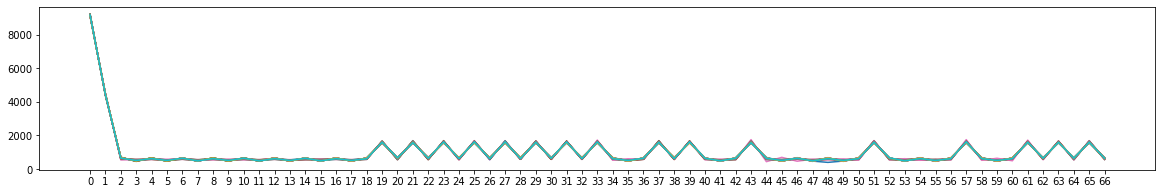

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 3]

x_val=list(range(67))
x=[str(i) for i in range(67)]
fig, ax = plt.subplots()
for dato in dat:
    ax.plot(dato)
plt.xticks(x_val)
plt.show()

In [ ]:
import numpy as np
A=np.array(dat)
A.shape

(20, 67)

In [ ]:
promedios=A.mean(axis=0)
promedios.shape

(67,)

In [ ]:
maximos=A.max(axis=0)
maximos.shape

(67,)

In [ ]:
minimos=A.min(axis=0)
minimos.shape

(67,)

In [ ]:
desv_est=A.std(axis=0)
desv_est.shape

(67,)

In [ ]:
for i in range(67):
    print(promedios[i],maximos[i],minimos[i],desv_est[i])

9171.35 9225 9110 33.98716669568089
4443.7 4511 4397 34.01484969833028
653.75 709 549 42.66599934373974
507.2 584 455 36.56993300513415
627.05 662 573 33.32487809430066
510.25 586 475 34.97981560843339
629.95 660 578 32.853424479040235
507.55 561 476 34.68209192075933
625.0 662 547 36.819831612868626
510.8 588 475 36.632772212869725
626.5 662 548 37.24580513292739
508.05 563 474 34.51155603562378
629.25 661 576 32.95735881407975
506.15 563 476 31.8092360801073
628.1 663 563 38.01170872244498
510.05 587 476 41.87418655926346
629.8 662 575 33.868274240061304
506.55 564 475 33.89170252436428
630.4 661 575 32.150272160589864
1607.85 1669 1557 34.08705766122972
632.95 687 549 40.73263433661024
1609.4 1693 1557 41.48059787418691
633.95 686 549 39.062097997931446
1610.7 1694 1555 37.79034268169581
626.35 662 550 39.31701285703175
1613.6 1695 1562 38.51025837358145
628.7 682 551 35.85679851855154
1615.4 1693 1582 34.170747723747574
627.95 662 578 31.94287870558945
1613.3 1668 1559 35.444463601

In [ ]:
impares=[promedios[i] for i in range(2,67) if i%2==1  ]
print(impares, end='')

[507.2, 510.25, 507.55, 510.8, 508.05, 506.15, 510.05, 506.55, 1607.85, 1609.4, 1610.7, 1613.6, 1615.4, 1613.3, 1609.55, 1616.6, 508.85, 1613.25, 1612.2, 507.95, 1615.35, 517.5, 506.3, 510.25, 1615.2, 510.95, 507.05, 1618.8, 508.0, 1613.2, 1610.0, 1613.05]

In [ ]:
pares=[promedios[i] for i in range(2,67) if i%2==0  ]
print(pares, end='')

[653.75, 627.05, 629.95, 625.0, 626.5, 629.25, 628.1, 629.8, 630.4, 632.95, 633.95, 626.35, 628.7, 627.95, 633.2, 628.8, 628.15, 627.8, 631.55, 629.15, 627.0, 622.2, 627.4, 614.05, 624.7, 628.8, 626.8, 624.75, 631.6, 625.0, 631.05, 628.65, 633.4]

In [ ]:
len(pares),max(pares),min(pares),sum(pares)/len(pares)

(33, 653.75, 614.05, 628.9015151515151)

Los Pares parece que se usan para separar los datos

In [ ]:
len(impares)

32

Finalmente se obtiene el código de la tecla 0; en binario, decimal y hexadecimal.

In [ ]:
binario=[('1' if impares[i] > 1000 else '0')  for i in range(32) ]
binario=''.join(binario)
binario

'00000000111111110110100010010111'

In [ ]:
cod=[int(binario[i*8 : (i+1)*8],2)  for i in range(4)]
cod

[0, 255, 104, 151]

In [ ]:
[hex(val) for val in cod]

['0x0', '0xff', '0x68', '0x97']